<a href="https://colab.research.google.com/github/alikrc/urban-sounds-classification/blob/main/Urban_Sounds_Classification_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from cv2 import imshow
import tensorflow as tf
import cv2 
import glob
# from PIL import Image
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.model_selection as ms
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


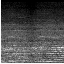

In [6]:
base_path = '/content/drive/MyDrive/soundsClassification/'

x_train=np.load(base_path+'x_train.npy')
y_train=np.load(base_path+'y_train.npy')
x_val=np.load(base_path+'x_val.npy')
y_val=np.load(base_path+'y_val.npy')
x_test=np.load(base_path+'x_test.npy')
y_test=np.load(base_path+'y_test.npy')

cv2_imshow(x_train[0])

In [7]:
np.shape(x_train), np.shape(y_train)

((5238, 64, 64), (5238,))

In [8]:
np.shape(x_val), np.shape(y_val)

((1747, 64, 64), (1747,))

In [9]:
np.shape(x_test), np.shape(y_test)

((1747, 64, 64), (1747,))

In [39]:
input_shape = 64
model = keras.Sequential(
    [
        layers.Conv2D(6, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(input_shape, input_shape, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"),


        layers.Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),


        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(84, activation='relu'),
        layers.Dropout(0.3),
        #layers.Dense(10, activation='relu'),
        #layers.Dropout(0.3),
        layers.Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 6)         60        
                                                                 
 average_pooling2d_28 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 16)          880       
                                                                 
 average_pooling2d_29 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_14 (Flatten)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 120)             

In [40]:
model.compile(optimizer="adam" ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=23, validation_data=(x_val, y_val))

Epoch 1/23
164/164 [==============================] - 1s 5ms/step - loss: 2.9554 - accuracy: 0.2497 - val_loss: 1.6199 - val_accuracy: 0.4322
Epoch 2/23
164/164 [==============================] - 1s 4ms/step - loss: 1.6986 - accuracy: 0.3975 - val_loss: 1.4153 - val_accuracy: 0.5255
Epoch 3/23
164/164 [==============================] - 1s 4ms/step - loss: 1.5123 - accuracy: 0.4612 - val_loss: 1.3019 - val_accuracy: 0.5501
Epoch 4/23
164/164 [==============================] - 1s 4ms/step - loss: 1.4125 - accuracy: 0.4998 - val_loss: 1.1848 - val_accuracy: 0.6268
Epoch 5/23
164/164 [==============================] - 1s 4ms/step - loss: 1.2747 - accuracy: 0.5582 - val_loss: 1.1406 - val_accuracy: 0.6314
Epoch 6/23
164/164 [==============================] - 1s 4ms/step - loss: 1.2271 - accuracy: 0.5771 - val_loss: 1.1133 - val_accuracy: 0.6497
Epoch 7/23
164/164 [==============================] - 1s 4ms/step - loss: 1.1462 - accuracy: 0.6067 - val_loss: 1.0111 - val_accuracy: 0.6657
Epoch 